Load libraries

In [235]:
#install.packages("fpc")
#install.packages("dbscan")
#install.packages("factoextra")
#install.packages(dplyr)

In [236]:
library("fpc")
library("dplyr")
library("dbscan")
library("factoextra")

## Get the data and setup

In [237]:
mall_data = read.csv('./mall_customers.csv', header = TRUE)
mall_data = data.frame(mall_data)
print(sprintf("Dataset of %d row with %d columns each", nrow(mall_data), ncol(mall_data)))

[1] "Dataset of 200 row with 5 columns each"


In [238]:
head(mall_data)
summary(mall_data)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<chr>,<int>,<int>,<int>
1,1,Male,19,15,39
2,2,Male,21,15,81
3,3,Female,20,16,6
4,4,Female,23,16,77
5,5,Female,31,17,40
6,6,Female,22,17,76


   CustomerID        Gender               Age        Annual.Income..k..
 Min.   :  1.00   Length:200         Min.   :18.00   Min.   : 15.00    
 1st Qu.: 50.75   Class :character   1st Qu.:28.75   1st Qu.: 41.50    
 Median :100.50   Mode  :character   Median :36.00   Median : 61.50    
 Mean   :100.50                      Mean   :38.85   Mean   : 60.56    
 3rd Qu.:150.25                      3rd Qu.:49.00   3rd Qu.: 78.00    
 Max.   :200.00                      Max.   :70.00   Max.   :137.00    
 Spending.Score..1.100.
 Min.   : 1.00         
 1st Qu.:34.75         
 Median :50.00         
 Mean   :50.20         
 3rd Qu.:73.00         
 Max.   :99.00         

In [239]:
sum(is.na(mall_data))

[1] 0

## Distributions and exploring data

In [240]:
males_age <- (mall_data %>% filter(Gender == 'Male') %>% select(Age))$Age
females_age <- (mall_data %>% filter(Gender == 'Female') %>% select(Age))$Age

ks.test(males_age, females_age)
mean(males_age)
mean(females_age)

Warning message in ks.test(males_age, females_age):
“cannot compute exact p-value with ties”



	Two-sample Kolmogorov-Smirnov test

data:  males_age and females_age
D = 0.11526, p-value = 0.5294
alternative hypothesis: two-sided


[1] 39.80682

[1] 38.09821

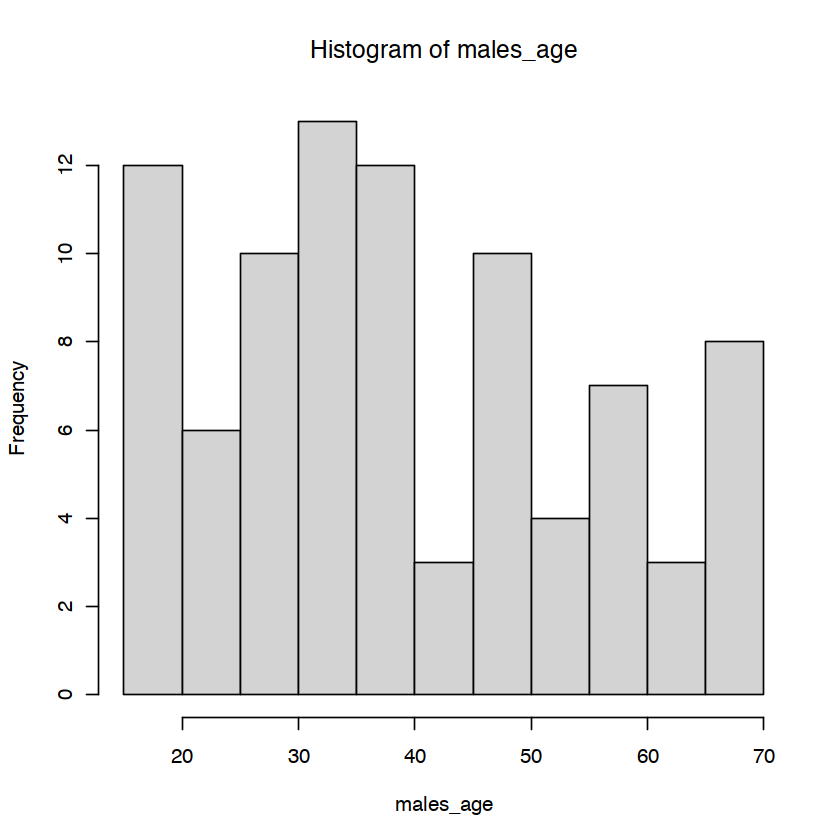

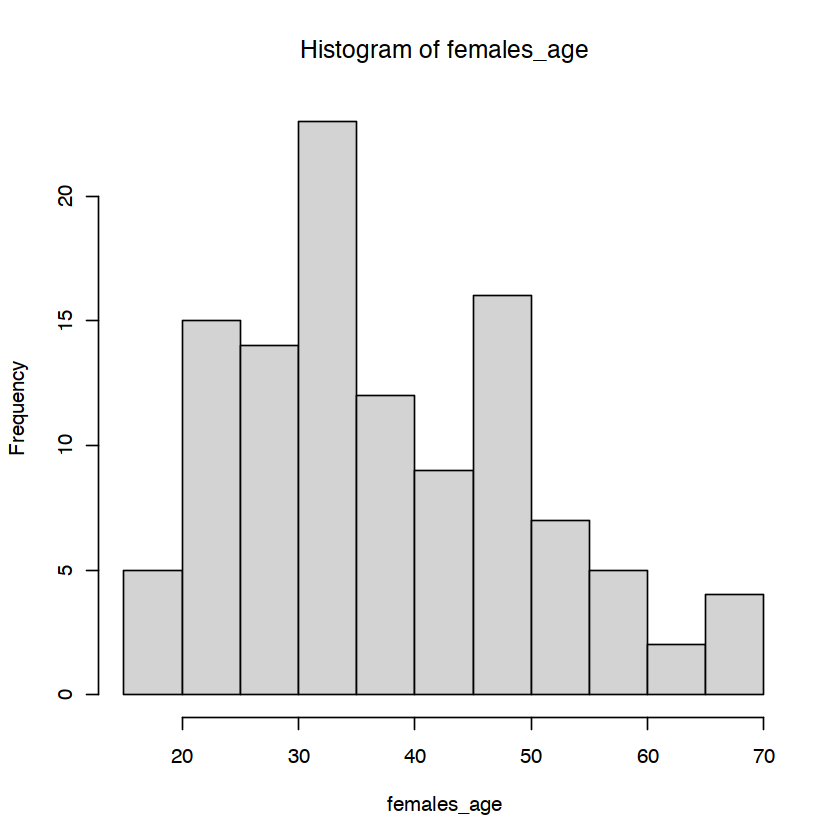

In [241]:
hist(males_age)
hist(females_age)

In [242]:
length(males_age)
length(females_age)

[1] 88

[1] 112

[1] 62.22727

[1] 59.25

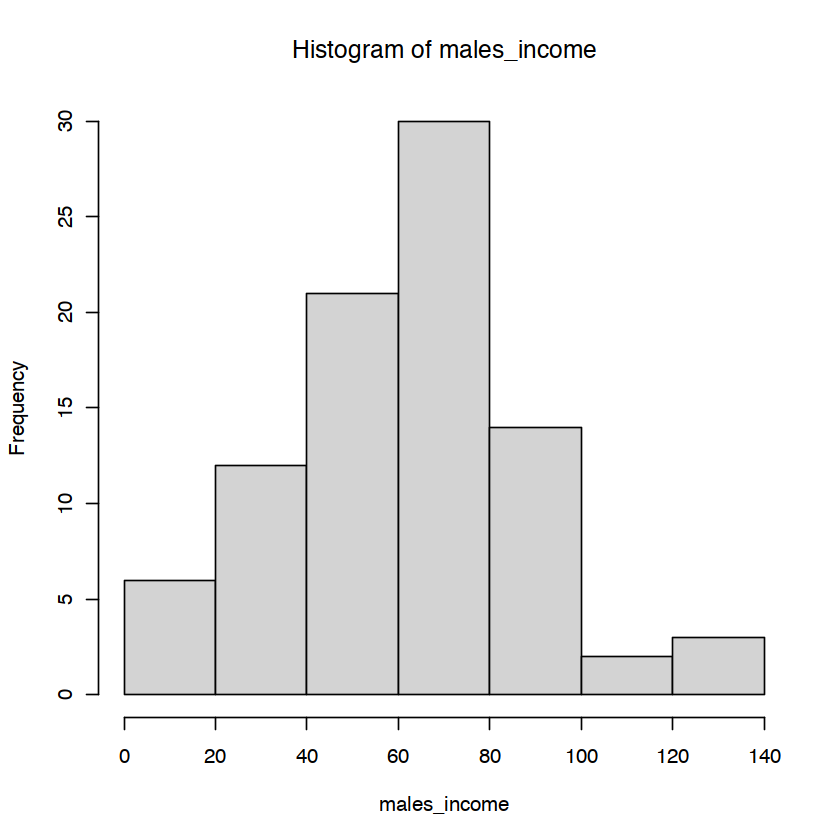

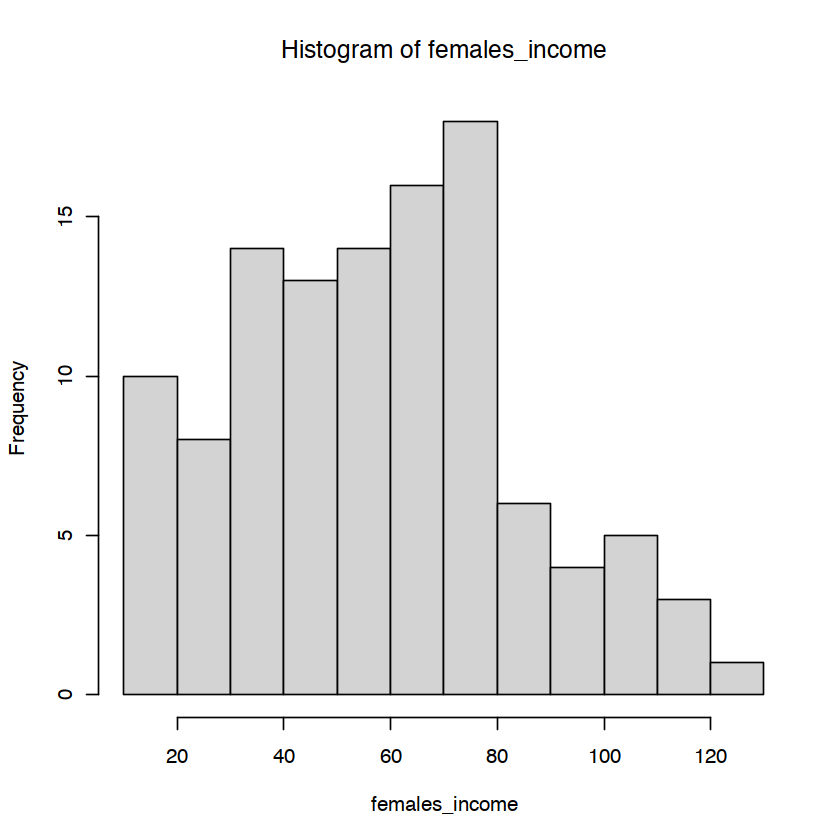

In [243]:
males_income <- (mall_data %>% filter(Gender == 'Male') %>% select(Annual.Income..k..))$Annual.Income..k..
females_income <- (mall_data %>% filter(Gender == 'Female') %>% select(Annual.Income..k..))$Annual.Income..k..

mean(males_income)
mean(females_income)
hist(males_income)
hist(females_income)

[1] 48.51136

[1] 51.52679

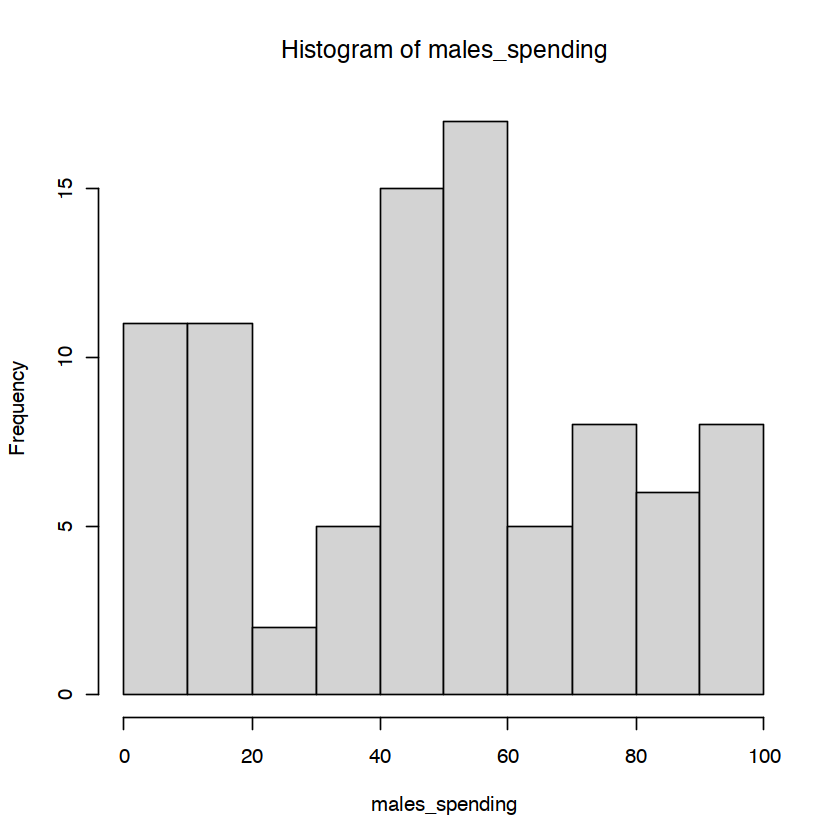

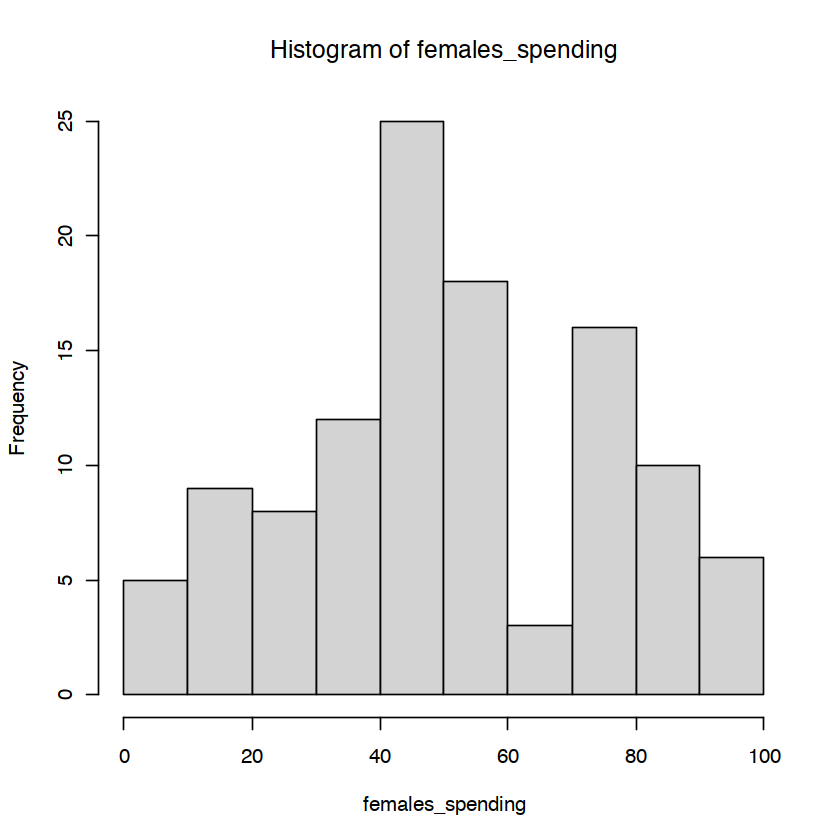

In [244]:
males_spending <- (mall_data %>% filter(Gender == 'Male') %>% select(Spending.Score..1.100.))$Spending.Score..1.100.
females_spending <- (mall_data %>% filter(Gender == 'Female') %>% select(Spending.Score..1.100.))$Spending.Score..1.100.

mean(males_spending)
mean(females_spending)
hist(males_spending)
hist(females_spending)

## Correlations

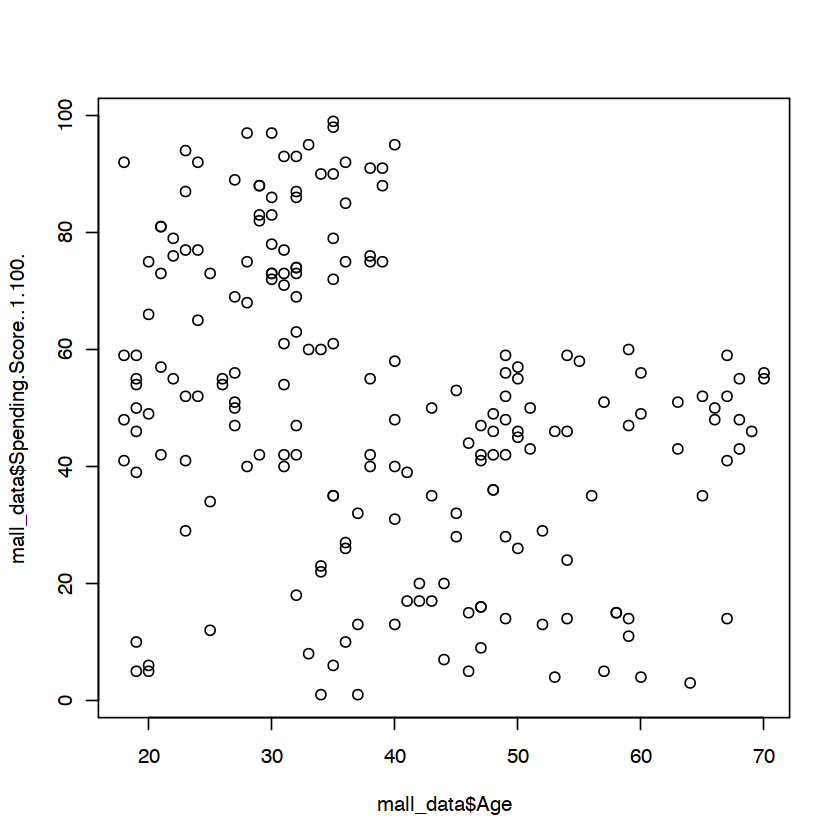

In [245]:
plot(mall_data$Age, mall_data$Spending.Score..1.100.)

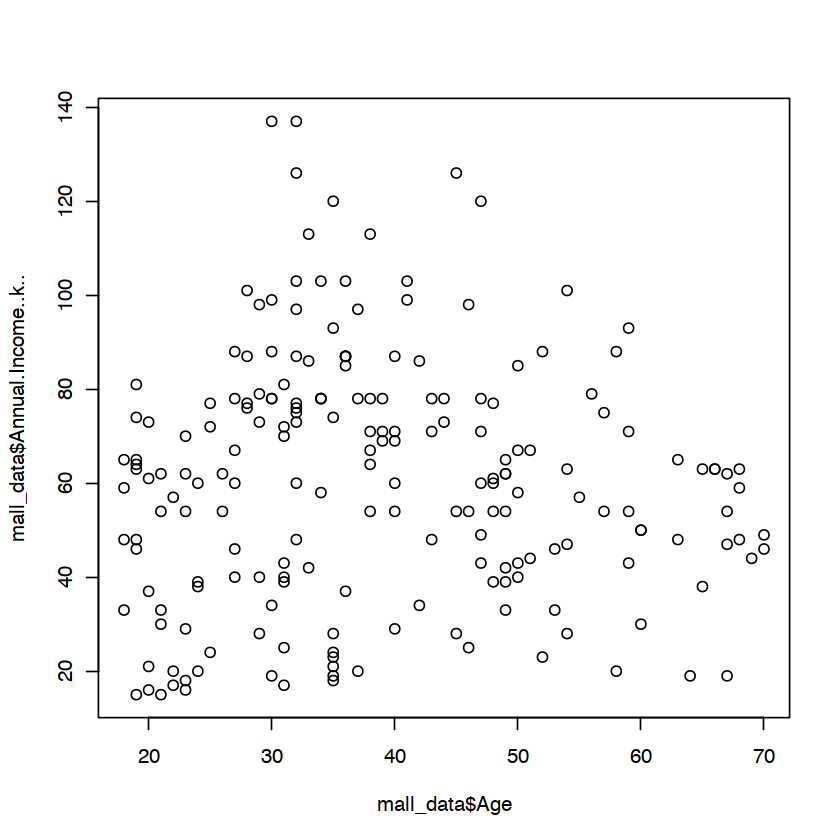

In [246]:
plot(mall_data$Age, mall_data$Annual.Income..k..)

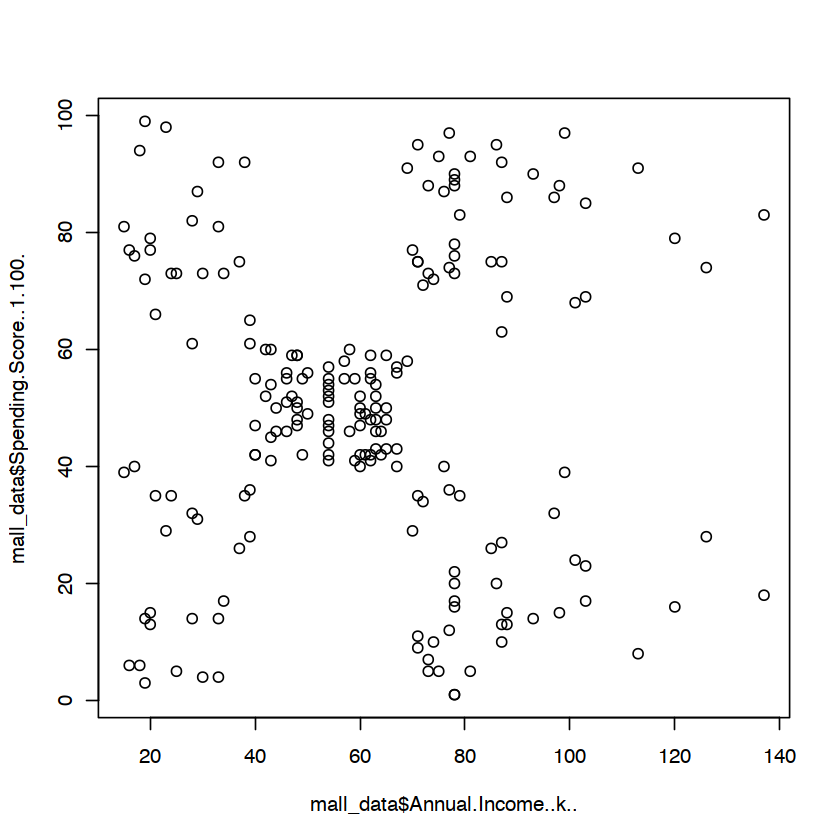

In [247]:
plot(mall_data$Annual.Income..k.., mall_data$Spending.Score..1.100.)

In [248]:
# only numerical data
mall_data$Gender[mall_data$Gender == 'Male'] <- -1
mall_data$Gender[mall_data$Gender == 'Female'] <- 1
mall_data$Gender <- as.integer(as.character(mall_data$Gender))
head(mall_data)

,CustomerID,Gender,Age,Annual.Income..k..,Spending.Score..1.100.
,<int>,<int>,<int>,<int>,<int>
1,1,-1,19,15,39
2,2,-1,21,15,81
3,3,1,20,16,6
4,4,1,23,16,77
5,5,1,31,17,40
6,6,1,22,17,76


## K means

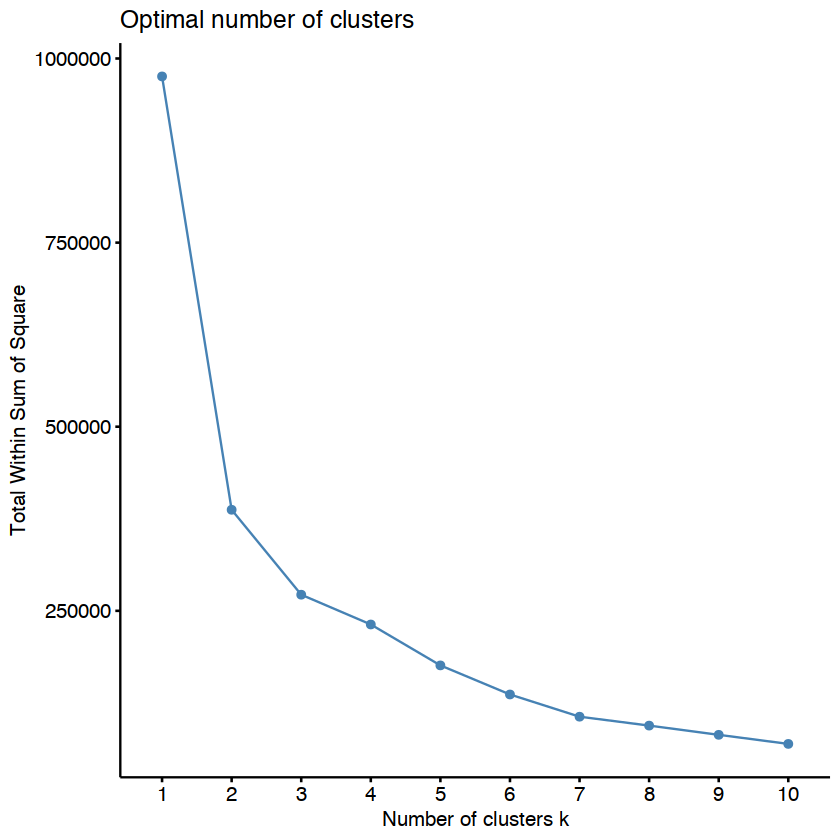

In [249]:
fviz_nbclust(mall_data, kmeans, method = c("wss"))

K-means clustering with 5 clusters of sizes 23, 59, 36, 64, 18

Cluster means:
  CustomerID      Gender      Age Annual.Income..k.. Spending.Score..1.100.
1   142.0870  0.13043478 33.17391           74.47826               80.52174
2    30.0678  0.25423729 36.10169           29.86441               49.86441
3   164.0000 -0.05555556 40.80556           87.91667               17.88889
4    91.5625  0.12500000 44.20312           57.40625               49.01562
5   183.0000  0.00000000 32.16667           99.88889               81.38889

Clustering vector:
  [1] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 4 4 2 4 4 4 4 4 4 4 4 4 4 4 4
 [75] 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[112] 4 4 4 4 4 4 4 4 4 1 4 1 1 4 1 4 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
[149] 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5 3
[186] 5 3 5 3 5 3 5 3 5 3 5 3 5 3 5

Within c

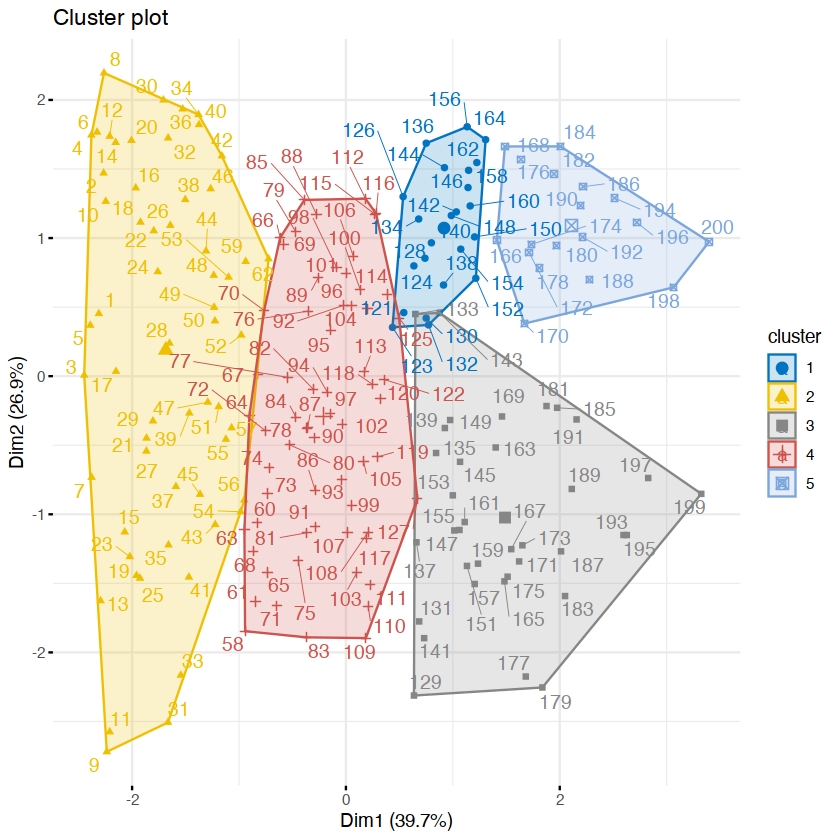

In [250]:
set.seed(0)
km.res <- kmeans(mall_data, 5)
fviz_cluster(km.res, data = mall_data, 
             ellipse.type = "convex",
             palette = "jco",
             repel = TRUE,
             ggtheme = theme_minimal())
km.res

K-means clustering with 6 clusters of sizes 21, 43, 35, 40, 18, 43

Cluster means:
  CustomerID      Gender      Age Annual.Income..k.. Spending.Score..1.100.
1  144.00000  0.14285714 33.14286           75.09524               82.76190
2   64.90698  0.11627907 46.76744           47.32558               49.27907
3  164.88571 -0.08571429 41.25714           88.37143               17.42857
4  106.70000  0.25000000 39.37500           62.87500               47.97500
5  183.00000  0.00000000 32.16667           99.88889               81.38889
6   22.13953  0.20930233 34.06977           25.44186               50.90698

Clustering vector:
  [1] 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 [38] 6 6 6 2 6 2 6 2 6 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
[112] 4 4 4 4 4 4 4 4 4 4 4 4 1 4 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
[149] 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 5 3 5

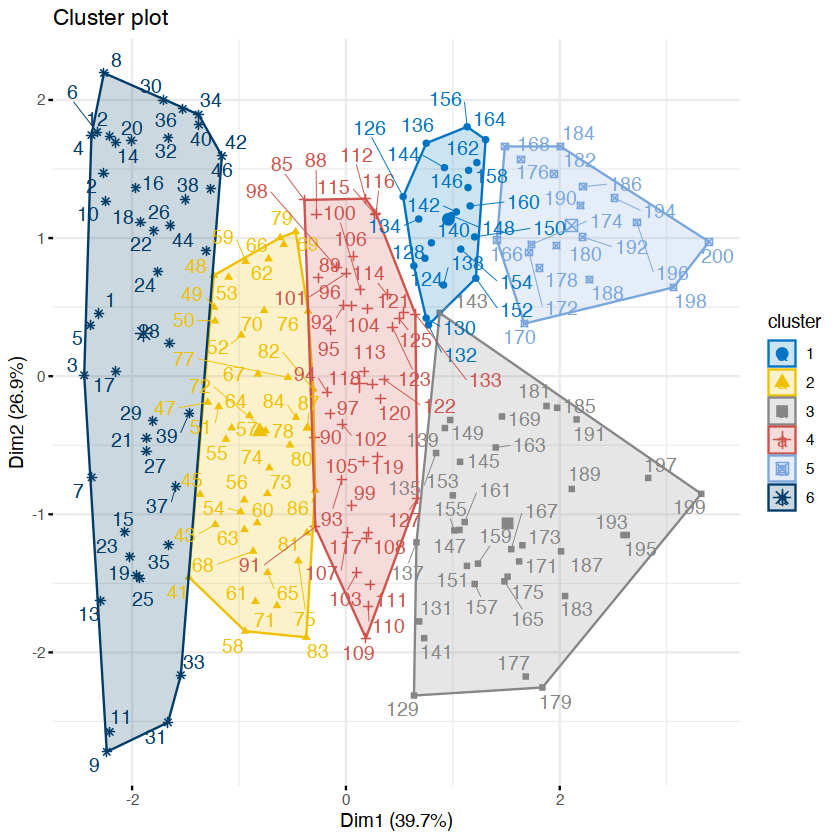

In [251]:
set.seed(0)
km.res <- kmeans(mall_data, 6)
fviz_cluster(km.res, data = mall_data, 
             ellipse.type = "convex",
             palette = "jco",
             repel = TRUE,
             ggtheme = theme_minimal())
km.res

## DBSCAN

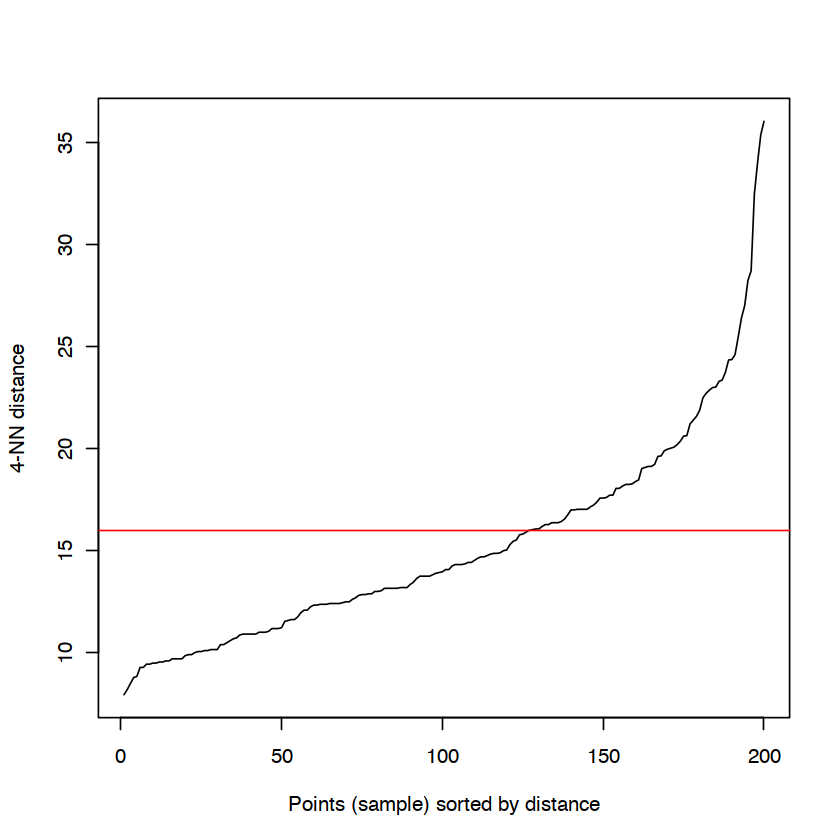

In [252]:
matrix = as.matrix(mall_data)
kNNdistplot(matrix, k=4)
abline(h=16, col="red")

In [253]:
mall_data = dbscan(matrix, 16, 4)
mall_data

DBSCAN clustering for 200 objects.
Parameters: eps = 16, minPts = 4
The clustering contains 6 cluster(s) and 25 noise points.

  0   1   2   3   4   5   6 
 25 101  10   7  33   4  20 

Available fields: cluster, eps, minPts

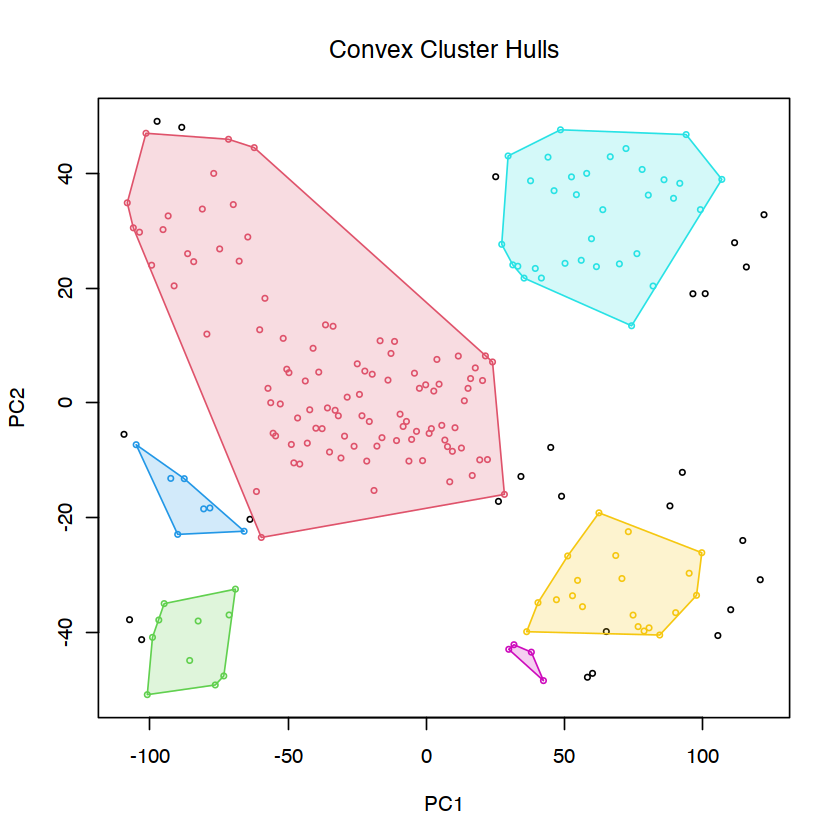

In [254]:
hullplot(matrix, mall_data$cluster)